In [1]:
# Problem Statement : To determine whether the client will subscribe to the bank's term deposit or not.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
bank = pd.read_csv('bank.csv',sep=';')

In [4]:
bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
bank.shape

(41188, 21)

In [6]:
# No. of rows = 41188
# No. of columns = 21

In [7]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
# No null values present in the original dataset

In [9]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
bank.job.value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
#Label Encoding only wherever required

In [14]:
bank.job = le.fit_transform(bank.job)

In [15]:
bank.marital.value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [16]:
# order of ordinal data is maintained so that the machine generates meaningful true insights

In [17]:
bank.marital.replace({'unknown':0, 'single':1, 'married':2, 'divorced':3}, inplace=True)

In [18]:
bank.education.value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [19]:
bank.education.replace({'unknown':0, 'illiterate':1, 'basic.4y':2, 'basic.6y':3, 'basic.9y':4, 'high.school':5, 'university.degree':6, 'professional.course':7}, inplace=True)

In [20]:
bank.default.value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [21]:
bank.default.replace({'unknown':0, 'yes':1, 'no':2}, inplace=True)

In [22]:
bank.housing.value_counts()

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

In [23]:
bank.housing.replace({'unknown':0, 'yes':1, 'no':2}, inplace=True)

In [24]:
bank.loan.value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [25]:
bank.loan.replace({'unknown':0, 'yes':1, 'no':2}, inplace=True)

In [26]:
bank.contact.value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

In [27]:
bank.contact = le.fit_transform(bank.contact)

In [28]:
bank.month.value_counts()

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [29]:
bank.month.replace({'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}, inplace=True)

In [30]:
bank.day_of_week.value_counts()

day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64

In [31]:
bank.day_of_week.replace({'mon':1,'tue':2,'wed':3,'thu':4,'fri':5}, inplace=True)

In [32]:
bank.poutcome.value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

In [33]:
bank.poutcome = le.fit_transform(bank.poutcome)

In [34]:
bank.y.value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [35]:
bank.y.replace({'yes':1,'no':2}, inplace=True)

In [36]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int32  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [37]:
#Sampling (Train-Test-Split)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
bank_train, bank_test = train_test_split(bank, test_size=0.2)

In [40]:
#Creating x & y variables for train and test data

In [41]:
bank_train_x = bank_train.iloc[:,:-1]
bank_test_x = bank_test.iloc[:,:-1]

In [42]:
bank_train_y = bank_train.iloc[:,-1]
bank_test_y = bank_test.iloc[:,-1]

In [43]:
#Build the model on Random forest and perform feature selection as directed

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc = RandomForestClassifier()

In [46]:
rfc.fit(bank_train_x, bank_train_y)

RandomForestClassifier()

In [47]:
rfc.feature_importances_

array([0.09240344, 0.04860663, 0.02366796, 0.04361744, 0.00882326,
       0.02069713, 0.01497062, 0.01035662, 0.01735927, 0.03966229,
       0.320593  , 0.04164244, 0.03231105, 0.01406243, 0.03045237,
       0.0199486 , 0.02362021, 0.02359438, 0.11203133, 0.06157955])

In [48]:
df = pd.DataFrame()

In [49]:
df['Features'] = bank_train_x.columns
df['Feature Importance'] = rfc.feature_importances_

In [50]:
df.sort_values(['Feature Importance'], ascending=False)

,Features,Feature Importance
10,duration,0.320593
18,euribor3m,0.112031
0,age,0.092403
19,nr.employed,0.061580
1,job,0.048607
3,education,0.043617
11,campaign,0.041642
9,day_of_week,0.039662
12,pdays,0.032311
14,poutcome,0.030452


In [51]:
bank = bank.drop(['default','contact','previous','loan','emp.var.rate','month','housing','cons.price.idx','marital','cons.conf.idx'], axis=1)

In [52]:
bank.columns

Index(['age', 'job', 'education', 'day_of_week', 'duration', 'campaign',
       'pdays', 'poutcome', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [53]:
len(bank.columns)

11

In [54]:
pred = rfc.predict(bank_test_x)
pred

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [55]:
# Model evaluation

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
cm = confusion_matrix(bank_test_y, pred)
cm

array([[ 512,  443],
       [ 260, 7023]], dtype=int64)

In [58]:
#From cm, it is clear that class2 has more representation than class 1 and hence model will perform well for class2 than class1.
# This is an unbalanced data (class imbalance). We will resolve it through oversampling after the normal sampling process.

In [59]:
bank_train.y.value_counts()

y
2    29265
1     3685
Name: count, dtype: int64

In [60]:
df1 = pd.DataFrame()

In [61]:
df1 = bank_train[bank_train.y == 1]

In [62]:
bank_train = pd.concat([bank_train, df1,df1,df1,df1,df1])

In [63]:
bank_train.y.value_counts()

y
2    29265
1    22110
Name: count, dtype: int64

In [64]:
bank_train_x = bank_train.iloc[:,:-1]
bank_train_y = bank_train.iloc[:,-1]

In [65]:
# Unbalanced data is handled

In [66]:
# Standardizing the data 

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()

In [69]:
# Standardising only the x variables of train & test and not the y variable bcz target(y) has to be in discrete classes only
#(class 1, class 2)

In [70]:
bank_train_x = scaler.fit_transform(bank_train_x)

In [71]:
bank_test_x = scaler.fit_transform(bank_test_x)

In [72]:
bank_train_x

array([[-0.79300804,  1.43194241,  0.32288011, ..., -1.14263228,
        -0.98010335, -0.49452607],
       [-1.21731346, -1.05969138, -1.28822765, ...,  1.27049435,
        -1.12106548, -0.76281458],
       [-1.72647997,  1.15509421, -1.28822765, ..., -0.47231933,
         0.99655806,  1.01679351],
       ...,
       [-0.19898045, -1.05969138,  1.93398786, ..., -1.31499847,
        -0.90137733, -0.49452607],
       [-1.04759129,  1.7087906 ,  0.32288011, ...,  1.69183392,
        -1.17957806, -0.76281458],
       [-0.96273021,  1.43194241, -1.28822765, ..., -1.14263228,
        -0.97691175, -0.49452607]])

In [73]:
#models are buildable on absolute standardised values and not on negative values. Hence taking their absolute.

In [74]:
bank_train_x = np.abs(bank_train_x)

In [75]:
bank_test_x = np.abs(bank_test_x)

In [76]:
# On standardization, datatype has changed to array. We need to convert it back to a dataframe

In [77]:
bank_train_x = pd.DataFrame(bank_train_x)

In [78]:
bank_test_x = pd.DataFrame(bank_test_x)

In [79]:
# MODEL BUILDING

In [80]:
# Model on Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
logi_bank = LogisticRegression()

In [83]:
logi_bank.fit(bank_train_x, bank_train_y)

LogisticRegression()

In [84]:
pred = logi_bank.predict(bank_test_x)
pred

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [85]:
cm = confusion_matrix(bank_test_y, pred)
cm

array([[ 781,  174],
       [2045, 5238]], dtype=int64)

In [86]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

In [87]:
accuracy_score(bank_test_y, pred)*100

73.06385044913814

In [88]:
recall_score(bank_test_y, pred)*100

81.78010471204189

In [89]:
precision_score(bank_test_y, pred)*100

27.636234961075722

In [90]:
roc_auc_score(bank_test_y, pred)*100

76.8505082121242

In [91]:
f1_score(bank_test_y, pred)*100

41.31182226924094

In [92]:
pred_proba = logi_bank.predict_proba(bank_test_x)
pred_proba

array([[0.04241327, 0.95758673],
       [0.03958794, 0.96041206],
       [0.04525746, 0.95474254],
       ...,
       [0.05521441, 0.94478559],
       [0.04629184, 0.95370816],
       [0.06421676, 0.93578324]])

In [93]:
#logistic regression precision_score = 26%

In [94]:
# Model on Naive Bayes

In [95]:
from sklearn.naive_bayes import MultinomialNB

In [96]:
nb = MultinomialNB()

In [97]:
nb.fit(bank_train_x, bank_train_y)

MultinomialNB()

In [98]:
pred = nb.predict(bank_test_x)
pred

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [99]:
cm = confusion_matrix(bank_test_y, pred)
cm

array([[ 353,  602],
       [ 833, 6450]], dtype=int64)

In [100]:
accuracy_score(bank_test_y, pred)*100

82.58072347657198

In [101]:
recall_score(bank_test_y, pred)*100

36.96335078534032

In [102]:
precision_score(bank_test_y, pred)*100

29.763912310286678

In [103]:
roc_auc_score(bank_test_y, pred)*100

62.76287819371369

In [104]:
f1_score(bank_test_y, pred)*100

32.975245212517514

In [105]:
# Naive Bayes precision_score = 30%

In [106]:
# Model on KNN

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
knn = KNeighborsClassifier()

In [109]:
# To get the appropriate k value (neighbors number), performing tradeoff b/w accuracy & stability

In [110]:
acc = []

for k in range(1,51):
    knn = KNeighborsClassifier(k)
    knn.fit(bank_train_x, bank_train_y)
    pred = knn.predict(bank_test_x)
    acc.append(accuracy_score(bank_test_y, pred)*100)

In [111]:
k = list(range(1,51))

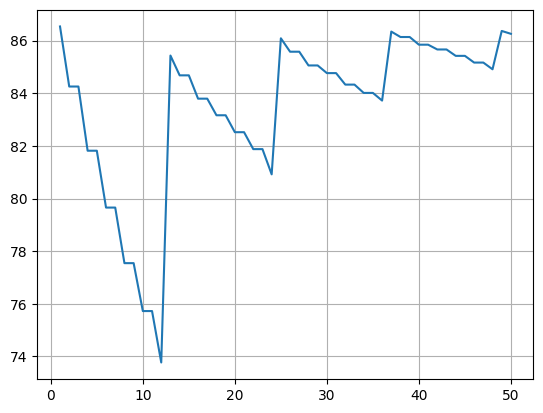

In [112]:
plt.plot(k, acc)
plt.grid()

In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
param = {'n_neighbors':list(range(1,51))}

In [115]:
grid = GridSearchCV(knn, param)

In [116]:
grid.fit(bank_train_x, bank_train_y)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=50),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [117]:
grid.best_params_

{'n_neighbors': 1}

In [118]:
knn = KNeighborsClassifier(n_neighbors=1)

In [119]:
knn.fit(bank_train_x, bank_train_y)

KNeighborsClassifier(n_neighbors=1)

In [120]:
pred = knn.predict(bank_test_x)
pred

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [121]:
cm = confusion_matrix(bank_test_y, pred)
cm

array([[ 462,  493],
       [ 616, 6667]], dtype=int64)

In [122]:
accuracy_score(bank_test_y, pred)*100

86.53799465889779

In [123]:
recall_score(bank_test_y, pred)*100

48.37696335078534

In [124]:
precision_score(bank_test_y, pred)*100

42.857142857142854

In [125]:
roc_auc_score(bank_test_y, pred)*100

69.95945517532401

In [126]:
f1_score(bank_test_y, pred)*100

45.4500737825873

In [127]:
#KNN precision_score = 43%

In [128]:
#logistic regression precision_score = 28%,  Naive Bayes precision_score = 30%,   KNN precision_score = 43%

As customer/client is our target, we need to primarily focus on precision_score while evaluating the model. From the above 3 models, the precision score for KNN model is the highest (43%). Hence, keeping in view the requirement fit, KNN model performs better comparitively.